# 4. Evaluating Model.
Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn has 3 different API for evaluating the quality of a model's predictions:
1. **Estimator (built-in) score method**: score() method provides default evaluation criterion for the problem they are designed to solve. This is embedded in the chosen machile learning estiomator algorithm. Thus each estimator will have their own score() method.
1. **Scoring parameter**: Model evaluation tools using cross validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. 
1. **Problem Specific Metric functions**: The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics. 

[read more on this Scikit Learn's Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

Finally, Dummy estimators are useful to get a baseline value of those metrics for random prodictions.

In this session we will try to evaluate the model deeper. One case for classification will use the heart_disease data. The other case for regression will use the Boston Housing data frame. 

## 4.1 Default score() method
This is the method attached to the estimator selected.

In our cases it will be score() methods for the RandomForestClassifier() and RandomForestRegressor() estimators.

In [169]:
import numpy as np, pandas as pd 
# import the heart disease data from csv
heart_df = pd.read_csv('../data/heart-disease.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I think since we already use this data before in previous sessions there are no need to validate the data any more. However, for best practice I will still validate just to see no NaN and Null in the data. 

In [170]:
# check for any Null data inside the df
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [171]:
# check for any NaN data in the df
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

All are safe, no null and no NaN values inside the data frame. We can start splitting the dataframe into label data and features data.

In [172]:
heart_y = heart_df['target']
heart_y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [173]:
heart_X = heart_df.drop('target', axis=1)
heart_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [174]:
# split the data into train and tests
from sklearn.model_selection import train_test_split
# set random seed
np.random.seed(42)
heart_X_train, heart_X_test, heart_y_train, heart_y_test = train_test_split(heart_X, heart_y, test_size=0.2)
(heart_X_train.shape, heart_y_train.shape, heart_X_test.shape, heart_y_test.shape)

((242, 13), (242,), (61, 13), (61,))

Now the split to train and test are done next is to select the model, fit it and then score it. 

For this I directly just select the RandomForestClassifier.

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
# fitting the model to the train and test data
rfc.fit(heart_X_train, heart_y_train)
rfc.score(heart_X_test, heart_y_test)

0.8688524590163934

I think it will be better to make the regression process first. This will make it easier as I will explore more model evaluation for classification and regression. Thius the progression of the model evaluation learning will be more seamless.

In [176]:
from sklearn.datasets import load_boston
boston = load_boston()
# since boston is a dictionary I need to transform to dataframe.
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df.head()

e:\udemy machine learning\udemy-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [177]:
# Now I need to add the target column to the boston df
boston_df['target'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now as usual as best practice I will check for NaN, and Null but I will make it faster in the form of total of all axis=1.

In [178]:
(boston_df.isna().sum().sum(), boston_df.isnull().sum().sum())

(0, 0)

Okay all data are valid since non NaN and null values inside the boston_df. 

Now we are ready to go on splitting the labelled data y and features data X.

Then split it into train and test data

In [179]:
boston_y = boston_df['target']
boston_X = boston_df.drop('target', axis=1)
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X, boston_y, test_size=0.2)
# since I already set the random seed above I don't need to set it again here as it is universal for all inside this file
# validate the shape
(boston_X_train.shape, boston_y_train.shape, boston_X_test.shape, boston_y_test.shape)

((404, 13), (404,), (102, 13), (102,))

Okay the shapes of the train test split results are validated.

Now we are ready to fit to the model and score it.

In [180]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(boston_X_train, boston_y_train)
rfr.score(boston_X_test, boston_y_test)

0.9094489776968475

Here the model evaluations are using the model() methods from each estimator. 

NOTE: different estimator will most likely have different score() method algorithm. For instance:

For RandomForestClassifier the score uses mean accuracy while for RandomForestRegressor uses coefficient of determination.

Calling the score() method on any model instance and passing it test data is a good quick way to see how the model is going. However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

In regression the score uses coeff R-squared method for regression evaluation parameters. The maximum = 1.0 and the minumum value = 0.0

## 4.2 Evaluating the model using the scoring parameter
The next step up from using score() is to use custom scoring parameter with cross_val_score() or GridSearchCV.

As you mya have gusessed, the scoring parameter you set will be different depending on the problem you're working on. 

We'll see some specific examples of different parameters in a moment but first let's check out cross_val_score().

We will use the heart_disease data frame and previous random forest classifier estimator we instantiate previously.

In [181]:
from sklearn.model_selection import cross_val_score
# note the random fores classifier is baing instantiated as rfc thus:
cross_val_score(rfc, heart_X, heart_y)

array([0.85245902, 0.90163934, 0.78688525, 0.78333333, 0.8       ])

The result is an array containing five numbers which resembles the score() result from previous scoring using the default random forest classifier estimator.

Just refresher here is the score of the random forest classifier on heart disease model:

In [182]:
rfc.score(heart_X_test, heart_y_test)

0.8688524590163934

The reason why the cross validation result array with 5 numbers is ~~because when building random forest classifier estimator we set the test-size=0.2 which means one fifth of the total data frame total data~~ accroding to [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation is because we **did not specified the CV parameter. Thus it uses its default value and split the sample in 5 folds**.

Let's see their mean:

In [183]:
np.mean(cross_val_score(rfc, heart_X, heart_y))

0.8248087431693989

Basically, to prevent overfitting the best practice is to separate the test and train data. The common practice is the test data is less in amount to train data. 

Unfortunately, there is still chances that the selection of train and test data are not so random. This will lead to other overfitting case. 

Thus in order to make sure this is not happening the model can have cross validation which in return will shift the data along the whole data. This will produce all model and tests for all data.

I think I need to use the same principle on the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation. 

The point to focus on is the CV parameter. This determine the cross validation splitting strategy. This is more than just giving how much splits but it can also determine the starting index and so much more.

The actual name for this setup is K-fold cross validation. I want to test different value of fold. Let's start by 4 fold:

In [184]:
# 4 fold cross validation
cross_val_score(rfc, heart_X, heart_y, cv=4)

array([0.85526316, 0.92105263, 0.78947368, 0.77333333])

In [185]:
#let's see the average
np.mean(cross_val_score(rfc, heart_X, heart_y, cv=4))

0.8414035087719298

Still there is a big gap compared to the score from the rfc. 

Now let's try 5 fold:

In [186]:
cross_val_score(rfc, heart_X, heart_y, cv=5)

array([0.83606557, 0.90163934, 0.80327869, 0.76666667, 0.78333333])

In [187]:
# let's see the average
np.mean(cross_val_score(rfc, heart_X, heart_y, cv=5))

0.8281967213114754

The average of the 5 fold is still off from the score. How about 10 fold?

Let's try cv=10:

In [188]:
cross_val_score(rfc, heart_X, heart_y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.86666667, 0.73333333, 0.83333333, 0.73333333, 0.8       ])

In [189]:
# let's see the average
np.mean(cross_val_score(rfc, heart_X, heart_y, cv=10))

0.8380645161290323

In [190]:
# just to make sure re seed the random
np.random.seed(42)
# comparison to the estimator (Random Forest Classifier) score
(np.mean(cross_val_score(rfc, heart_X, heart_y, cv=10)), rfc.score(heart_X_test, heart_y_test))

(0.8280645161290323, 0.8688524590163934)

Even as the CV gets higher the mean cross validation score and the estimator score gets closer, but there is still difference between them.

Even the result of the cross validation scores are mostly lower thus their average is lower than estimator score, if you're being asked to give metrics of the model you preferably used the cross validation metrics.

But we haven't use any scoring parameter yet. By default the cross validation scoring parameter is set to None. 

Here is the [Documentation on the scoring parameter for cross validation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

In [191]:
# this is using the default scoring which is None
cross_val_score(rfc, heart_X, heart_y, cv=5, scoring=None)

array([0.85245902, 0.90163934, 0.81967213, 0.81666667, 0.78333333])

Now I want to use the cross_val_score method for heart disease data and uses scoring parameter. Let's start with scoring= 'accuracy'. I will use the cv=5 since so far this is the best scoring on cross_val_score method.

In [192]:
cross_val_score(rfc, heart_X, heart_y, cv=5, scoring='accuracy')

array([0.83606557, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

Let's compare the scoring None vs scoring 'accuracy' results:

In [193]:
(cross_val_score(rfc, heart_X, heart_y, cv=5, scoring=None), cross_val_score(rfc, heart_X, heart_y, cv=5, scoring='accuracy'))

(array([0.83606557, 0.90163934, 0.78688525, 0.81666667, 0.78333333]),
 array([0.81967213, 0.90163934, 0.81967213, 0.78333333, 0.78333333]))

The result is slightly different but not too much. I stil does not understand what is the difference between the default scoring with using accuracy parameter.

### 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come acreoss for classification models are:
1. Accuracy
1. Area under ROC curve 
1. Confusion matrix
1. Classification report

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

#### 4.2.1.1. Accuracy

Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. This is probably the metric you'll see most oftern used for classification problems.

However, we'll see in a second how it always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easiliy convert it into a percentage. We will use Python String interpolation using f-string method. You can search with that keyword for more information.

In [194]:
# accuracy score for the heart disease estimator
# using string interpolation f-string method:
print(f"Heart Disease Classifier (Random Forest Classifier) accuracy: {rfc.score(heart_X_test, heart_y_test)*100:.2f}%")

Heart Disease Classifier (Random Forest Classifier) accuracy: 86.89%


#### 4.2.1.2. Area Under Receiver Operating Characteristic (ROC) Curve

If this one sounds like a mouthful, its because reading the full name is. 

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic of ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true positive rate (tpr) versus false positive rate (fpr).

For clarity:
* True postive: model predicts 1 when truth is 1
* False Positive : model predicts 1 when truth is 0
* True negative : model predicts 0 when truth is 0
* False negative : model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [195]:
# show the heart_X_test
heart_X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [196]:
# import
from sklearn.metrics import roc_curve

# we will use probabilities as the y_score of the roc_curve
y_probs = rfc.predict_proba(heart_X_test)
y_probs.size

122

In [197]:
# this will probabilities on the data fit
y_probs[:5]

array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ]])

In [198]:
# I will only use probabilities for the positive class only
y_probs = y_probs[:,1]
# slicing the y probs to only includes the column 1 which is the probabilities of positive class occurs
y_probs.size

61

In [199]:
# see the modiied y_probs
y_probs

array([0.106, 0.565, 0.545, 0.129, 0.77 , 0.855, 0.714, 0.052, 0.033,
       0.529, 0.776, 0.279, 0.936, 0.114, 0.957, 0.983, 0.985, 0.118,
       0.035, 0.053, 0.524, 0.096, 0.657, 0.737, 0.678, 0.67 , 0.757,
       0.757, 0.133, 0.822, 0.095, 0.09 , 0.025, 0.346, 0.566, 0.141,
       0.574, 0.771, 0.623, 0.874, 0.841, 0.769, 0.804, 0.695, 0.718,
       0.248, 0.599, 0.99 , 0.151, 0.037, 0.2  , 0.193, 0.804, 0.738,
       0.18 , 0.103, 0.361, 0.974, 0.124, 0.002, 0.154])

Positive class means classification that value guess to 1 or positive on having heart disease. This is what index [,1] means since it only took the second probabilities of the whole probabilities.

NOTE: the first proba array [0.89, 0.11] means the first case will have 89% chance of does not have heart disease (class negative) and 11% chance of having heart disease (class positive). We only need the 11% probability value to make the ROC curve.

sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

y_true will use the heart_y_test and y_score will use y_proba for positive class.

In [200]:
# heart_y_test is the test part of the data which determine if a sampe has heart desease of not. 
heart_y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

NOTE: thus the heart_y_test will only consist of 0 and 1 data since it will only consist of boolean type data. Length 61 which consistent with the number of rows in heart_X_test

In [201]:
# calculate the fpr, tpr, and treshold
fpr, tpr, treshold = roc_curve(heart_y_test, y_probs)
# fpr = false positive rate
# tpr = true positive rate

# check the false positive rate:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.72413793, 0.72413793, 1.        ])

In [202]:
# check the treshold ( I still don't know what treshold here means?)
treshold

array([1.99 , 0.99 , 0.822, 0.804, 0.769, 0.757, 0.678, 0.657, 0.623,
       0.599, 0.566, 0.565, 0.524, 0.361, 0.279, 0.096, 0.095, 0.002])

In [203]:
treshold.size

18

In [204]:
# now looking at the false positive rate and true positive rate data from the roc calculation
fpr.size

18

In [205]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.72413793, 0.72413793, 1.        ])

In [206]:
tpr.size

18

In [207]:
tpr

array([0.     , 0.03125, 0.3125 , 0.375  , 0.5    , 0.53125, 0.71875,
       0.71875, 0.75   , 0.75   , 0.8125 , 0.8125 , 0.90625, 0.90625,
       0.96875, 0.96875, 1.     , 1.     ])

Looking at these results on their own doesn't make much sense. It will be much easier to inspecte them visually.

Scikit-Learn does not have a buiilt in function to plot ROC, thus we need matplotlib. 

Often we will need to plot more than one ROC thus it will make sense to make function to plot them and reuse it multiple times later on. 

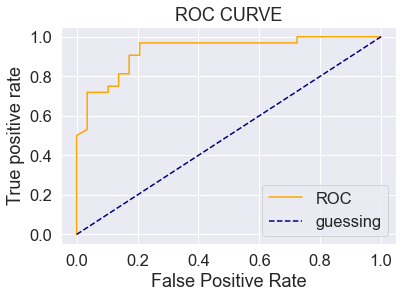

In [208]:
import matplotlib.pyplot as plt 
# I choose pyplot since this is simple single ROC plot and no axis control needed nor complex chart produced

# make the function to plot ROC

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate and true positive rate of a classifier
    The x axis should be the false positive rate (fpr)
    The y axis should be the true positive rate (tpr)
    """
    # plotting the curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plotting the line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='navy', label='guessing', linestyle = '--')
    # customize
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('ROC CURVE')
    plt.legend()
    plt.show()

# now let's test one using the available fpr tpr:
plot_roc_curve(fpr, tpr)


Okay the displayed curve might be confusing.

TLDR; The closer the curve to the top left corner means the model performes well.. 
Thus the closer the curve to the baseline (--) then the model is no better then just guessing.


A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve), Scikit-Learn implements a function to calculate this called [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

The maximum ROC AUC score is 1.0 and generally, the closer to 1.0 the better the model. Note that AUC = 1.0 must be treated with the grain of salt.

AUC means Area Under The Curve means it is the integral result of the function of the ROC!

sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [209]:
# find the AUC score
from sklearn.metrics import roc_auc_score

# y_true = heart_y_test, y_score = y_probs
# remember max AUC score is 1.0 thus any value of AUC near 1.0 is considered better but treat this with grain of salt.
roc_auc_score(heart_y_test, y_probs)

0.9294181034482759

The most ideal position of ROC is in the top left corner of the plot. This would mean that the model predicts only true positive and will result in AUC score of 1.0.

You can simulate this by creating ROC curve and AUC score using only heart_y_test.

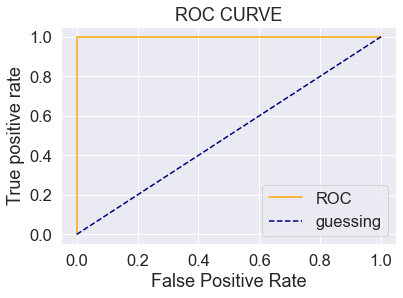

In [210]:
# plot perfect ROC
# produce fpr, tpr from only heart_y_test
fpr_perfect, tpr_perfect, treshold_perfect = roc_curve(heart_y_test, heart_y_test)
# NOTE this plot_roc_curve will results perfect ROC curve plot:
plot_roc_curve(fpr_perfect, tpr_perfect)

In [211]:
# perfect AUC score
roc_auc_score(heart_y_test, heart_y_test)

1.0

In reality, a perfect ROC is unlikely.

#### SUMAMRY ON ROC:
ROC will produce treshold which will be used to interpret the probability produced by rfc.predict_proba(health_X_test)

if treshold is 0.5 -> proba = [0.809, 0,191] means our treshold will interpret the result as class 0 thus compared with heart_Y_test if the data is 0 thus it is TRUE NEGATIVE. 

if treshold is 0.9 -> proba = [0.809, 0,191] means our treshold will interpret the result as class 1 thus compared with heart_Y_test if the data is 0 thus it is FALSE POSITIVE. 

NOTE: Remeber that treshold is not attribute on Random Forest Classifier, you can't change this. This is automatically calculated when we use the RPC model to evaluate the RFC model using the test portion of our data (heart_X_test). 

You might change the portion of training to test data from our original data and compare ROC (or more suitable is AOC) between them to find best setting. Or maybe change the number of estimator on the RFC then compare AOC to find the best estimator settings.

#### 4.2.1.3. Confusion matrix

Okay let's see [Wikipedia on Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

Confusion matrix is a quick way to compare the labels a model prodicts and the actual labels it was supposed to predict. In essence, it giving you an idea of where the model is getting confused.

sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [212]:
from sklearn.metrics import confusion_matrix
# let's find y prediction using the Random Forest Classifier model
heart_y_preds = rfc.predict(heart_X_test)

# make the confusion matrix
confusion_matrix(heart_y_test, heart_y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

Again this is probably easier to understand if being visualized.

One way to do it is with [pandas.crosstab()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

In [213]:
# making cross tab
pd.crosstab(heart_y_test, heart_y_preds, rownames=["actual label"], colnames=["predicted label"])

predicted label,0,1
actual label,,
0,24,5
1,3,29


I need to learn about pandas crosstab function (pd.crosstab())

Now we need to make this data to be more visually easier to comprehend. One most obvious is to use Seaborn's heatmap() plot. 

What is [seaborn](https://seaborn.pydata.org/). It is based on Matplotlib and I am sure I use it before when learning about matplotlib.

However, when I checked I don't have seaborn in my conda list of package. Thus I need to install the seaborn to my conda package. 

But I want to try to install seaborn from inside my Jupyter Notebook. Here is how:
```python
# import sys to access system command including install
import sys
# here is the command
!conda install --yes --prefix {sys.prefix} seaborn
```

I guess this is not working. I still need to instal it manually using the CLI in bash.

The library is also included as part of the Anaconda distribution:

conda install seaborn

Dependencies
Supported Python versions

    - Python 3.6+

Required dependencies

If not already present, these libraries will be downloaded when you install seaborn.

    - numpy
    - scipy
    - pandas
    - matplotlib

Now we are ready to use seaborn

<AxesSubplot:>

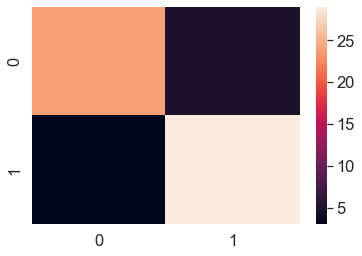

In [214]:
# plot confusion matrix in seaborn
import seaborn as sns 

# set the font scale
sns.set(font_scale=1.5)

# create confusion matrix
conf_mat = confusion_matrix(heart_y_test, heart_y_preds)

# plot using seaborn 
sns.heatmap(conf_mat)

The plot isn't offering much at this moment. Let's add some communication on it.

**NOTE**: IN THE ORIGINAL NOTEBOOK, the function below had the "True label" as in the x-axis label and the "Predicted label" as in the y-axis label. But due to the way [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) output values, these should be swapped around.The code below has been corrected.

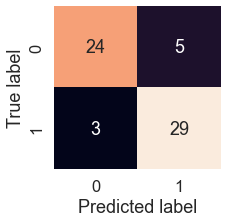

In [215]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False) 
    # note the annot means anootate the box
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(conf_mat)

Okay now the ideal confusion matrix means the diagonal of 0 to 0 and 1 to 1 of both true and predicted labels are the only ones filled and zero for the rests.


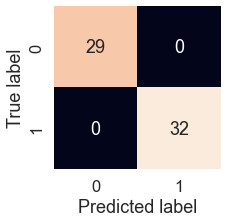

In [216]:
# example of perfect confusion matrix
perfect_conf_mat = confusion_matrix(heart_y_test, heart_y_test)
# plot it
plot_conf_mat(perfect_conf_mat)

This means all predicted 1 all correctly predict of class 1 which has 32 data in total classification. Vice versa for the 0 class.

Now, sklearn also has plot of confusion matrrix function called [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix), but at this report is written it has been deprecated. 

The alternative is the [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator).

But I need to learn this first.

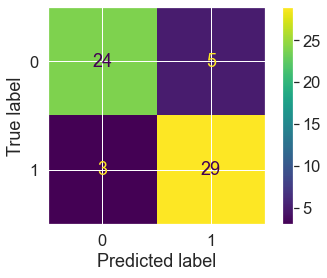

In [217]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot() 

I don't like the cross line on the nubmer labels that makes me harder to read the confusion matrix values. I need to learn more oon how to modify the display of this sklearn display confusion matrix. 

#### 4.2.1.3 ADDITIONAL

Since there are new course on confusion matrix using the latest version of Scikit Learn (1.0+) meaning the older Scikit learn need some additonal section. This is the section to accomodate it

The version of the sklearn previously installed in this machine is 0.24.2. Which means it is older and it is not the 1.0+ version which required to run the latest confusion matrix features.

However, since from the [installing Scikit Learn webpage](https://scikit-learn.org/stable/install.html) only provides way to install using pip I will install using pip.

I already made sure that I am in the correct conda env before launching the pip install -U command. 

After install before checking the sklearn version you need to Restart the kernel on the Jupyter Notebook and click Run All!! For safety measure you can add deactivate and re activate the env after install.

The sklearn.__version__ should return version higher than 1.0

In [218]:
import sklearn
sklearn.__version__
# the version must return higer than 1.0 in order to continue

'1.1.1'

But what we are going to do is using the confusion matrix latest feature which is Confusion Matrix Display which we already done before. 

But now we will use another feature from that library called from_estimator and from_predictions

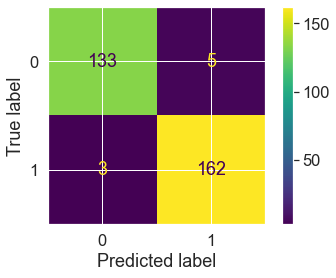

In [219]:
# from_estimator(estimator, X, y)
ConfusionMatrixDisplay.from_estimator(estimator=rfc, X=heart_X, y=heart_y)

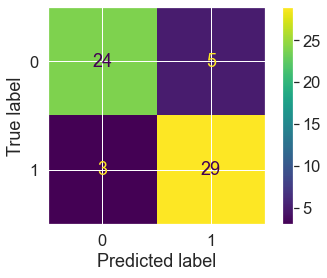

In [220]:
# Now from prediction
ConfusionMatrixDisplay.from_predictions(y_true=heart_y_test, y_pred=heart_y_preds)

#### 4.2.1.4. CLASSIFICATION REPORT

The final major metric you should consider when evaluatin a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

Let's learn this one.

### sklearn.metrics.classification_report

sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

[source](https://github.com/scikit-learn/scikit-learn/blob/0d378913b/sklearn/metrics/_classification.py#L1964)

In [221]:
# import the classification_report function
from sklearn.metrics import classification_report

# remember for classification problem (heart disease data):
# heart_y_test
# heart_y_preds

print(classification_report(heart_y_test, heart_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### How to read this?
It returns four columns precision, recall, f1-score and support.

The number of rows will depend on how many different classes (variable or values considered when building the model) there are. But there will always be three rows labelled accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* Precision - Indicates ther proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positive has precision of 1.0 (max score)
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has recall of 1.0
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect acuracy is equal to 1.0 in other word, getting the prediction right 100% of the time.
* Macro Avg - Short for macro average, the average precision, recall and F1 score between classes, Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted Avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metrics is calculated with respect to how many samples there are.

### When Should You Use Each?
It can be tempting to base your classification models performance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced clases.

For example, let's say there were 10.000 people, and 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99,99% accurate. Which sounds great... until you realise, all its doing is predicting no one has the disease, in other words all 10.000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

Here is the example:

In [222]:
# where precision and recall become valuable
# let's set the stage first 10.000 data with 1 value 1 and other 9999 are zeros
disease_true = np.zeros(10000)
disease_true[0] = 1 
# meaning from 10.000 data only one in the top have value = 1

# simulate that all predicitions are zero including the prediction for disease_true[0] which will be false.
# however, this will ensure 99.99% accuracy
disease_pred = np.zeros(10000)

# arrage all of these
pd.DataFrame(classification_report(disease_true, disease_pred,
                                    output_dict=True))



e:\udemy machine learning\udemy-ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\udemy machine learning\udemy-ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\udemy machine learning\udemy-ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Okay the warnings are expected but let's just continue

You can see we have got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.

Although this model achieved 99.99% accuracy, will it be useful?

To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.



### 4.2.2. Regression model evaluation metrics

Similar to classification, there are [several metrics you can use to evaluate your regression models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

We'll check out the folowing.

1. **R^2 (r-squared) or coefficient of determination** = Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the meand of the targets, its r-squared value would be 0. If your model perfectly predicts a range of numbers it's r-squared value would be 1.
1. **Mean Absolute Error (MAE)** = The Average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your prediction were. 
1. **Mean Squqared error (MSE)** = The average squared differences between prediction and actual values. Squaring the errors removes negative errors. It is also amplifies outliers (samples which have larger errors).

Let's see them in action. First, we'll bring down our regression model code again. 

In [223]:
rfr.fit(boston_X_train, boston_y_train)

RandomForestRegressor()

In [224]:
rfr.score(boston_X_test, boston_y_test)

0.8987690441044096

Okay, I have confirmed that the Boston Housing data frame has been set in this workspace. Next we will use the current calculation and data thus we can just go to the r-squared method. 

Here is the [link to the r2_score docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).

sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

In [225]:
# import the libs for r-squared 
from sklearn.metrics import r2_score

# for this case we will compare the r-squared to mean of the y test. 
# This means I need to make an array which all of its element is y_test mean. 
# we can use numpy for this
boston_y_test_mean = np.full(len(boston_y_test), boston_y_test.mean())

# Now we are ready to use the array of y test mean to find the whole r-squared evaluation of the model.
r2_score(boston_y_test, boston_y_test_mean)

0.0

Well the result is a bit off. The best result will have the r-squared = 1.

In [226]:
r2_score(boston_y_test, boston_y_test)

1.0

In [227]:
# let's make the y prediction based on X test and the model from Random Forest Regressor:
boston_y_preds = rfr.predict(boston_X_test)
# and then we can use the prediction to calculate coef of determination to compare to rfr.score
r2_score(boston_y_test, boston_y_preds)

0.8987690441044096

As you can see the result of r2_score() for boston_y_test and boston_y_preds is the same as the result of rfr.score().

NOTE: boston_y_preds = rfr.predict(boston_X_test)
meaning this is the prediction result using the model rfr (Random Forest Regressor) using input of boston_X_test NOT the training data boston_X_train.

For regression models, you will want to maximize r-squared and minimize both MAE and MSE. 

NOTE: MAE (Mean Absolute Error) and MSE (Mean Squared Error)

#### 4.2.2.1. MEAN ABSOLUTE ERROR (MAE)

A model's mean absoute error can be calculated with Scikit Learn's [mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) function.

sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

In [228]:
# Mean Absolute Error (MAE)
# model here is rfr (Random Forest Regressor)
# Data: Boston housing data
from sklearn.metrics import mean_absolute_error

# boston_y_preds = rfr.predict(boston_X_test)
boston_mae = mean_absolute_error(boston_y_test, boston_y_preds)
boston_mae

2.1000588235294133

Let's proof the formula MAE = AVERAGE(ABSOLUTE(predicted values - actual values))

Let's make data frame of actual and predicted values 

In [229]:
# put the data into data frame.
boston_mae_df = pd.DataFrame(data={"actual values": boston_y_test, "predicted values": boston_y_preds})
boston_mae_df["differences"] = boston_mae_df["predicted values"] - boston_mae_df["actual values"]
boston_mae_df

,actual values,predicted values,differences
93,25.0,24.007,-0.993
27,14.8,15.375,0.575
482,25.0,28.997,3.997
379,10.2,11.956,1.756
426,10.2,16.074,5.874
...,...,...,...
15,19.9,20.552,0.652
439,12.8,11.769,-1.031
387,7.4,7.582,0.182
123,17.3,17.191,-0.109


In [230]:
# now let's try to average the difference:
boston_mae_df["differences"].mean()

-0.206529411764708

But the result is DIFFERENT with the 2.1000588235294133 of MAE above!!

Of course, this is because I HAVE NOT YET ABSOLUTE THE difference axis.

In [231]:
np.absolute(boston_mae_df["differences"]).mean()

2.1000588235294133

Now the result is the same as the MAE result using the sklearn.metrcis one! This is because we use absolute difference value on the data.

NOTE: np.absolute and np.abs functions are the same thing: np.abs is just abrreviation (short hand) for np.absolute, they both operating in the same way

#### 4.2.2.2. Mean Square error (MSE)

In [232]:
# Mean Square error 
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(boston_y_test, boston_y_preds)
mse

9.170597529411765

Now we get the MSE number: 9.991446490196079

This number is calculated by averaging the squared difference of the last data frame.

Here is the proof

In [233]:
# manually calculated MSE 

boston_squared_diff = np.square(boston_mae_df["differences"])
boston_squared_diff.mean()

9.170597529411765

The difference axis in the boston_mae_df is being squared (thus eliminate the negative values).

However, since it is being squared the result will most likely LARGER compared to MAE.

This is because MAE only absolute while MSE is squared.

Thus bit of WARNING here: MSE tend to AMPLIFY differences thus when the data changes in numbers or other properties the difference will be bigger in MSE.

## 4.2.3 Finally using the scoring parameter

As a refresh scoring parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric is to return using cross-validation.

Let's check out with our classification model and the heart disease dataset

In [234]:
# we already import the Cross_val_accuracy above when measuring the Random Forest Classifier model (rfc)
# REVISIT: In[23] to In[25]
np.random.seed(42)
cv_acc = cross_val_score(rfc, heart_X, heart_y, cv=5, scoring="accuracy")
cv_acc


array([0.83606557, 0.8852459 , 0.81967213, 0.8       , 0.76666667])

We've seen these array before in In[25] and we got 5 different accuracy scores on different test splits of the data. The only difference is this time I put its formal parameter scoring and give it `"accuracy"` as argument.

Averaging this gives the cross-validated accuracy:

In [235]:
print(f"The cross_validated_accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross_validated_accuracy is: 82.15%


The same goes for the other metrics we've been using for classification.

Let's try `"precision"`

In [236]:
np.random.seed(42)

# start the cross validation precision
cv_precision = cross_val_score(rfc, heart_X, heart_y, cv=5, scoring="precision")
cv_precision

array([0.82857143, 0.90625   , 0.84375   , 0.8       , 0.74358974])

Now let's average the array to get the cross validated precision:

In [237]:
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 82.44%


How about `"Recall"`?

In [238]:
np.random.seed(42)

# cross validated recall
cv_recall = cross_val_score(rfc, heart_X, heart_y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.87878788, 0.81818182, 0.84848485, 0.87878788])

In [239]:
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 86.06%


And for F1 score:

In [240]:
np.random.seed(42)
cv_f1 = cross_val_score(rfc, heart_X, heart_y, cv=5, scoring="f1")
cv_f1

array([0.85294118, 0.89230769, 0.83076923, 0.82352941, 0.80555556])

In [241]:
print(f"The cross-validated F1 score is: {np.mean(cv_f1)*100:.2f}%")

The cross-validated F1 score is: 84.10%


##### Repeat this Steps for Regression

We already have Regression model on Boston data. Thus we can just go ahead I guess

We begin with the default of course. If for classifier the refault is for `accurcy` in Regression the default is `r2`

In [242]:
np.random.seed(42)
cv_r2 = cross_val_score(rfr, boston_X, boston_y, cv=5, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [243]:
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.4f}")

The cross-validated R^2 score is: 0.6244


##### CAUTION:
For the Mean Absolute Error (MAE) we can use `"neg_mean_absolute_error"` which will return scoring of all negative numbers. But why??

Because Scikit-Learn documentation states:
> ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Which in this case, means a lower negative value (closer to 0) is better. 

In [244]:
np.random.seed(42)
cv_mae = cross_val_score(rfr, boston_X, boston_y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [245]:
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.4f}")

The cross-validated MAE score is: -3.0312


How about negative for Mean Squared Error? Since it is squared will it be automatically becoming positive? Well... let's try:

In [246]:
np.random.seed(42)
cv_mse= cross_val_score(rfr, boston_X, boston_y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

In [247]:
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.4f}")

The cross-validated MSE score is: -21.2614


Apparently even as the Mean Squared Error it still retain its negative values.

## 4.3 Using different evaluation metrics with Scikit-Learn

This is the next....